In [33]:
import random
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

Tasks 1, 2 and 3

1. Probability that the individual is further than 15 at t=100: 0.283
2. Probability density for the individual's location at t=100:


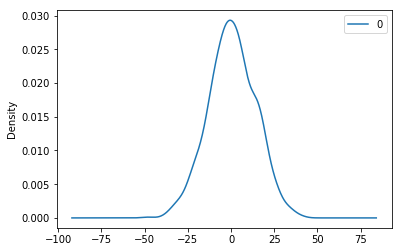

In [283]:
n = 1000
t = 200
location = np.zeros(n)
displacement = np.zeros(n)

for j in range(n):
    a = 0
    for i in range(t):
        r = random.random()
        if (r > 0.5): a += 1
        else: a -= 1
    location[j] = a
    displacement[j] = abs(a)
    
prob = len([x for x in location if ((x > 15) | (x < -15))])/1000
print("1. Probability that the individual is further than 15 at t=100: " + str(prob))
print("2. Probability density for the individual's location at t=100:")
pd.DataFrame(location).plot(kind='density')

Displacement plot:


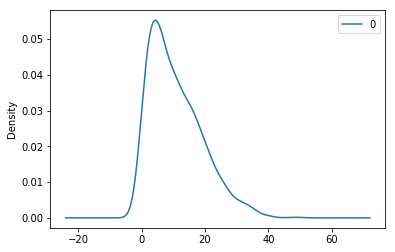

In [284]:
print("Displacement plot:")
pd.DataFrame(displacement).plot(kind='density')

Functional approach

In [285]:
f = lambda x: 1 if x > 0.5 else -1

for i in range(n): 
    location[i] = sum(list(map(f, np.random.random_sample(100))))

Task 4: 
Eulerian method: What is the probability that the system is at a certain state?

1. Probability that the individual is further than 15 km at t=100
2. Probability density for the individual's location at t=100

1. 0.2936248439421088
2. probability density plot:


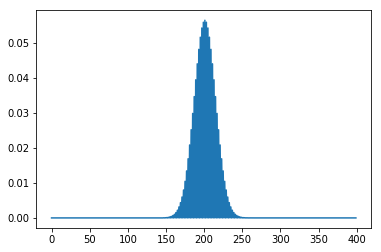

In [291]:
v = np.zeros(2*t)
v[t+1] = 1

for i in range(t):
    nv = np.zeros(2*t)
    for j in range(1,(2*t),1):
        # first and last index special cases
        if (j == 1): nv[j] = v[j+1]/2
        elif (j == (2*t)-1): nv[j] = v[j-1]/2
        else:
            pre = v[j-1]
            nex = v[j+1]
            new_prob = (pre+nex)/2
            nv[j] = new_prob
    v = nv


smaller = v[1:(t-15)]
bigger = v[(t+15):(2*t)]
prob = sum(smaller)+sum(bigger)
print("1. " + str(prob))

print("2. probability density plot:")
plt.plot(v)

~~Task 4~~
Eulerian method: What is the probability that the system is at a certain state?

1. Probability that the individual is further than 15 km at t=100
2. Probability density for the individual's location at t=100

_Note: I checked the material poorly, so at first I approximated the function with normal distribution with parameters that produce similar plot to the one got from the Lagrangian method._

1: 0.28884436634648486
2: density function at t=100:


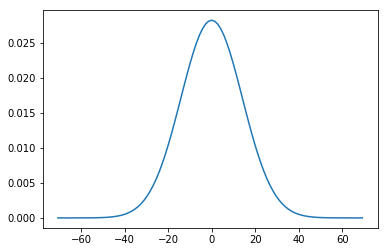

In [292]:
x = np.arange(-5,5,0.1)
d = math.sqrt(t)/t

plt.plot(math.sqrt(t)*x, d*norm.pdf(x))

ans = (1-norm.cdf(d*15))+(norm.cdf(d*-15))

print("1: " + str(ans))
print("2: density function at t=100:")